## The Street View House Numbers, Recognizing multi-digit numbers in Images


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from keras.utils import to_categorical

import h5py

In [6]:
print(tf.__version__)

1.14.0


In [7]:
print(keras.__version__)

2.3.0


### Read the DataSet

In [8]:
#Fetching the dataset from the file

with h5py.File('SVHN_single_grey1.h5', 'r') as f:
    # List all groups
    print("Keys: %s" % f.keys())
    print("Keys: %s" % list(f.keys())[0])
    print("Keys: %s" % list(f.keys())[1])
    print("Keys: %s" % list(f.keys())[2])
    print("Keys: %s" % list(f.keys())[3])
    print("Keys: %s" % list(f.keys())[4])
    print("Keys: %s" % list(f.keys())[5])
    X_test = list(f.keys())[0]
    X_train = list(f.keys())[1]
    X_val = list(f.keys())[2]
    y_test = list(f.keys())[3]
    y_train = list(f.keys())[4]
    y_val = list(f.keys())[5]

    # Get the data
    X_test = list(f[X_test])
    X_train = list(f[X_train])
    X_val = list(f[X_val])
    y_test = list(f[y_test])
    y_train = list(f[y_train])
    y_val = list(f[y_val])

Keys: KeysView(<HDF5 file "SVHN_single_grey1.h5" (mode r)>)
Keys: X_test
Keys: X_train
Keys: X_val
Keys: y_test
Keys: y_train
Keys: y_val


- DataSet is already devided into 3 subsets
    - Training set - This dataset is usually used to Train the model
    - Validation Set - This dataset is usually used to run our trained model , and then improve the performance by tuning hyperparameters
    - Test Set - This is pure Test dataset, final model should be run on this to predict the result and performance of our model

In [9]:
#we can see that the dataset has the split values already, lets check the size of each

print('size of X_train is %d'%(len(X_train)))
print('size of y_train is %d'%(len(y_train)))

print('size of X_val is %d'%(len(X_val)))
print('size of y_val is %d'%(len(y_val)))

print('size of X_test is %d'%(len(X_test)))
print('size of y_test is %d'%(len(y_test)))

size of X_train is 42000
size of y_train is 42000
size of X_val is 60000
size of y_val is 60000
size of X_test is 18000
size of y_test is 18000


In [10]:
#Lets check One of the training value

In [11]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [12]:
X_train[0].shape
# We can see that every element is n * 32 * 32 metrics 

(32, 32)

#### Lets convert the list variables to Numpy array

In [13]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_val=np.array(X_val)
y_val=np.array(y_val)
X_test=np.array(X_test)
y_test=np.array(y_test)

##### Lets plot one of the data to understand how the image looks and what is its corresponding correct classification

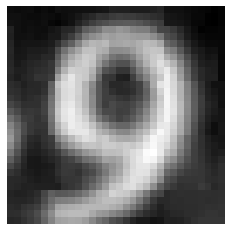

9


In [14]:
i=600

plt.imshow(X_train[i,:],cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

print(y_train[i])


In [15]:
# Lets print the shape of each dataset

print(X_train.shape, X_val.shape ,X_test.shape , y_train.shape, y_val.shape,y_test.shape)

(42000, 32, 32) (60000, 32, 32) (18000, 32, 32) (42000,) (60000,) (18000,)


### Data Preprocessing

In [16]:
# since we have 3-D data and models wont accept it we need to conver it to 2-D
 
#Reshaping the data ( n * 32 * 32) to (n * 1024)

X_train_new = X_train.reshape((X_train.shape[0],-1))
X_val_new = X_val.reshape((X_val.shape[0],-1))
X_test_new = X_test.reshape((X_test.shape[0],-1))

In [17]:
# Lets print the shape now

print(X_train_new.shape, X_val_new.shape ,X_test_new.shape , y_train.shape, y_val.shape,y_test.shape)

(42000, 1024) (60000, 1024) (18000, 1024) (42000,) (60000,) (18000,)


In [18]:
# Currently the target variables hold the classification value like values ranging from 0 to 9, 
#we have to convert them to binary values 
# example if value is 2 then we have to conver it to 0 0 1 0 0 0 0 0 0 0
# We can either use OneHotEncoding technique or Keras builtin to_categorical 

y_train_new = to_categorical(y_train)
y_val_new = to_categorical(y_val)
y_test_new = to_categorical(y_test)

#we can also use below technique

'''encoder = OneHotEncoder()

y_train_new = encoder.fit_transform(y_train_new).toarray()
y_val_new = encoder.fit_transform(y_val_new).toarray()
y_test_new = encoder.fit_transform(y_test_new).toarray()'''


'encoder = OneHotEncoder()\n\ny_train_new = encoder.fit_transform(y_train_new).toarray()\ny_val_new = encoder.fit_transform(y_val_new).toarray()\ny_test_new = encoder.fit_transform(y_test_new).toarray()'

In [19]:
# Lets print the shape now

print(X_train_new.shape, X_val_new.shape ,X_test_new.shape , y_train_new.shape, y_val_new.shape,y_test_new.shape)

(42000, 1024) (60000, 1024) (18000, 1024) (42000, 10) (60000, 10) (18000, 10)


In [20]:
y_test_new[1,:]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

##### Normalize the train ,validate and test data
This is important as all values spread in same range

In [21]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_val_new = sc.fit_transform(X_val_new)
X_test_new = sc.fit_transform(X_test_new)

### K-Nearest Neighbor(KNN) classifier Apporach
##### Lets build the model using KNN classifier and see how the model behaves

In [120]:
# Import required libraries

from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report 

In [23]:
# Create the model

knn_model = KNeighborsClassifier(n_neighbors=2)

#Fit the model
knn_model.fit(X_train_new,y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [24]:
#y_pred = knn_model.predict(X_test_new)

### KNN has been executed from googleColab and result of it is attached separately

### Deep Learning Technique ( Neural Network Classifier)
##### Lets build the model using keras framework

In [26]:
#import the required libraries

import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras import optimizers

In [27]:
#Reset Default graph - Needed as we build the graph at every stage and may cause issue when run in sequence/repeated
import tensorflow as tf
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph>

In [163]:
# Lets create method to evaluate the model on Test data set

def evaluateModel(model):
    print('\n# Evaluate on test data')
    results = model.evaluate(X_test_new, y_test_new, batch_size=500)
    print('test acc:', results[1])

#### Few points to be noted before we build the Neural Network
- We have 3 set of data, training data, validate data and test data
- we have classification scenario with target value ranging from 0 to 9
- Lets start building Neural Network with only 1 hidden node

### Basic Neural Network -1
#### Lets start building Neural Network with only 1 hidden node
#### use Activation funtion 'relu'
#### kernelinitializer 'uniform'
#### Optimizer 'adam'

#### Lets Initialize & build the model

In [38]:
#Initialize the Neural Network
model1_keras = Sequential()

##### We have input feature of 1024 and output 10 categorical values , hence input shape will be 1024 and output node will be 10

In [39]:
#Lets create input layer
model1_keras.add(Dense(units=512,kernel_initializer='uniform',input_shape=(1024,)))
#Add activation
model1_keras.add(Activation('relu'))

In [40]:
#Adding 1st hidden layer
model1_keras.add(Dense(200, kernel_initializer='uniform'))
#Add activation
model1_keras.add(Activation('relu'))

In [41]:
# Adding the output layer
# we have an output of 10 node, which is the the desired dimensions of our output
model1_keras.add(Dense(10, kernel_initializer='uniform')) 
#Add activation
# We use the softmax because we have multiclass classification
model1_keras.add(Activation('softmax'))

In [42]:
# now compile the network
#Using loss function as categorical_crossentropy as we have multiclass classification
model1_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
# now fit the model
model1_keras_result = model1_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 20s 464us/step - loss: 1.1821 - accuracy: 0.6202 - val_loss: 0.9281 - val_accuracy: 0.7076
Epoch 2/20
42000/42000 [==============================] - 18s 418us/step - loss: 0.7911 - accuracy: 0.7568 - val_loss: 0.7257 - val_accuracy: 0.7778
Epoch 3/20
42000/42000 [==============================] - 18s 420us/step - loss: 0.6774 - accuracy: 0.7904 - val_loss: 0.6129 - val_accuracy: 0.8130
Epoch 4/20
42000/42000 [==============================] - 18s 428us/step - loss: 0.6027 - accuracy: 0.8149 - val_loss: 0.5681 - val_accuracy: 0.8295
Epoch 5/20
42000/42000 [==============================] - 18s 427us/step - loss: 0.5559 - accuracy: 0.8277 - val_loss: 0.5994 - val_accuracy: 0.8173
Epoch 6/20
42000/42000 [==============================] - 18s 428us/step - loss: 0.5134 - accuracy: 0.8409 - val_loss: 0.5711 - val_accuracy: 0.8236
Epoch 7/20
42000/42000 [==============================] 

In [45]:
#Method to visualize training and validation acccuracy

def plotModelTrainingValidationLossAccuracy(model_result):
    plt.plot(model_result.history['accuracy'])
    plt.plot(model_result.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(model_result.history['loss'])
    plt.plot(model_result.history['val_loss']) 
    plt.title('Model loss') 
    plt.ylabel('Loss') 
    plt.xlabel('Epoch') 
    plt.legend(['Train', 'Val'], loc='upper left') 
    plt.show()
    

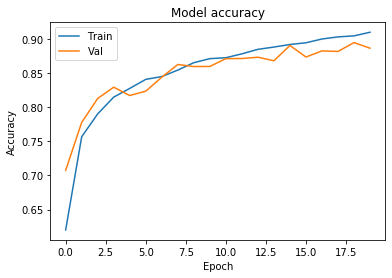

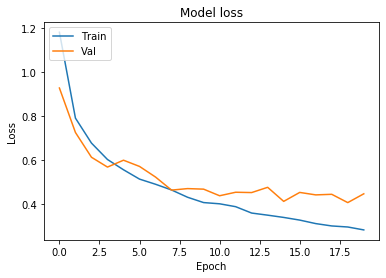

In [46]:
plotModelTrainingValidationLossAccuracy(model1_keras_result)

#### We can see that Training Accuracy is 91% and Validation Accuracy is 88%, We can tune the model to improve the performance

### Neural Network -2

### Basic Neural Network -2
#### Lets add 2 hidden node
#### use Activation funtion 'relu'
#### kernelinitializer 'uniform'
#### Optimizer 'adam'

In [47]:
#Initialize the Neural Network
model2_keras = Sequential()

In [48]:
#Lets create input layer
model2_keras.add(Dense(units=512,kernel_initializer='uniform',input_shape=(1024,)))
#Add activation
model2_keras.add(Activation('relu'))

#Adding 1st hidden layer
model2_keras.add(Dense(256, kernel_initializer='uniform'))
#Add activation
model2_keras.add(Activation('relu'))

#Adding 2nd hidden layer
model2_keras.add(Dense(256, kernel_initializer='uniform'))
#Add activation
model2_keras.add(Activation('relu'))

# Adding the output layer
# we have an output of 10 node, which is the the desired dimensions of our output
model2_keras.add(Dense(10, kernel_initializer='uniform')) 
#Add activation
# We use the softmax because we have multiclass classification
model2_keras.add(Activation('softmax'))

# now compile the network
model2_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# now fit the model
model2_keras_result=model2_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 20s 482us/step - loss: 1.2153 - accuracy: 0.5970 - val_loss: 0.9040 - val_accuracy: 0.7145
Epoch 2/20
42000/42000 [==============================] - 24s 579us/step - loss: 0.8079 - accuracy: 0.7474 - val_loss: 0.7307 - val_accuracy: 0.7724
Epoch 3/20
42000/42000 [==============================] - 25s 588us/step - loss: 0.6899 - accuracy: 0.7837 - val_loss: 0.6469 - val_accuracy: 0.8005
Epoch 4/20
42000/42000 [==============================] - 21s 490us/step - loss: 0.6166 - accuracy: 0.8073 - val_loss: 0.5945 - val_accuracy: 0.8150
Epoch 5/20
42000/42000 [==============================] - 20s 466us/step - loss: 0.5593 - accuracy: 0.8245 - val_loss: 0.5463 - val_accuracy: 0.8300
Epoch 6/20
42000/42000 [==============================] - 22s 517us/step - loss: 0.5212 - accuracy: 0.8359 - val_loss: 0.5158 - val_accuracy: 0.8421
Epoch 7/20
42000/42000 [==============================] 

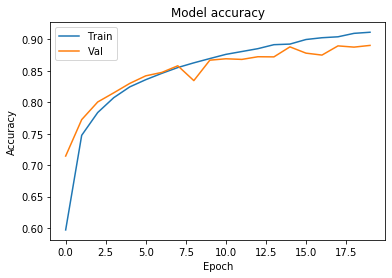

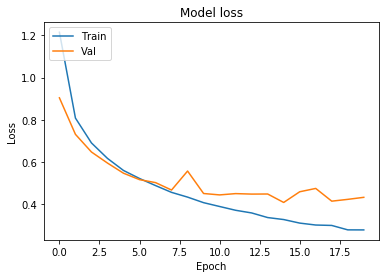

In [49]:
plotModelTrainingValidationLossAccuracy(model2_keras_result)

#### We can see that Training Accuracy is 91% and Validation Accuracy is 89%, We can tune the model to improve the performance

### Basic Neural Network -3
#### Lets add 2 hidden node
#### use Activation funtion 'relu'
#### kernelinitializer 'uniform'
#### Optimizer 'adam', with learning rate 0.01


In [50]:
#Initialize the Neural Network
model3_keras = Sequential()

In [51]:
#Lets create input layer
model3_keras.add(Dense(units=512,kernel_initializer='uniform',input_shape=(1024,)))
#Add activation
model3_keras.add(Activation('relu'))

#Adding 1st hidden layer
model3_keras.add(Dense(256, kernel_initializer='uniform'))
#Add activation
model3_keras.add(Activation('relu'))

# Adding the output layer
# we have an output of 10 node, which is the the desired dimensions of our output
model3_keras.add(Dense(10, kernel_initializer='uniform')) 
#Add activation
# We use the softmax because we have multiclass classification
model3_keras.add(Activation('softmax'))

# Lets create adam optimizer 
adam = optimizers.adam(learning_rate=0.01)

# now compile the network
model3_keras.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])


# now fit the model
model3_keras_result=model3_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 18s 428us/step - loss: 2.3354 - accuracy: 0.1070 - val_loss: 2.2867 - val_accuracy: 0.1083
Epoch 2/20
42000/42000 [==============================] - 21s 494us/step - loss: 2.2999 - accuracy: 0.1050 - val_loss: 2.3075 - val_accuracy: 0.1024
Epoch 3/20
42000/42000 [==============================] - 21s 497us/step - loss: 2.3341 - accuracy: 0.1015 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 4/20
42000/42000 [==============================] - 19s 449us/step - loss: 2.3037 - accuracy: 0.0980 - val_loss: 2.3047 - val_accuracy: 0.1000
Epoch 5/20
42000/42000 [==============================] - 22s 522us/step - loss: 2.3038 - accuracy: 0.0978 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/20
42000/42000 [==============================] - 24s 564us/step - loss: 2.3037 - accuracy: 0.1019 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 7/20
42000/42000 [==============================] 

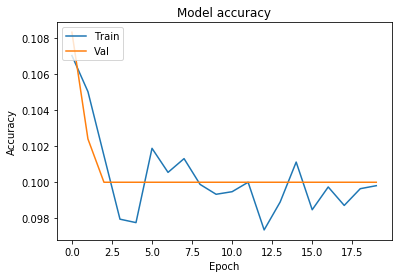

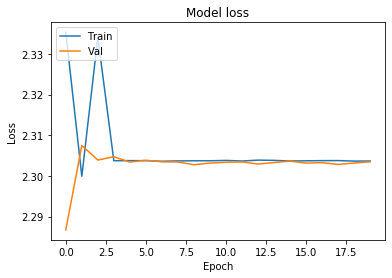

In [52]:
plotModelTrainingValidationLossAccuracy(model3_keras_result)

#### We can see that with learning rate 0.01 model performance is very poor .Training Accuracy is 10% and Validation Accuracy is 10%

### Neural Network -4
#### Lets add 2 hidden node
#### use Activation funtion 'relu'
#### kernelinitializer 'uniform'
#### Optimizer 'SGD' with learning rate 0.01

In [53]:
#Initialize the Neural Network
model4_keras = Sequential()

In [54]:
#Lets create input layer
model4_keras.add(Dense(units=512,kernel_initializer='uniform',input_shape=(1024,)))
#Add activation
model4_keras.add(Activation('relu'))

#Adding 1st hidden layer
model4_keras.add(Dense(256, kernel_initializer='uniform'))
#Add activation
model4_keras.add(Activation('relu'))

# Adding the output layer
# we have an output of 10 node, which is the the desired dimensions of our output
model4_keras.add(Dense(10, kernel_initializer='uniform')) 
#Add activation
# We use the softmax because we have multiclass classification
model4_keras.add(Activation('softmax'))

# Lets create adam optimizer 
sgd = optimizers.SGD(learning_rate=0.01)

# now compile the network
model4_keras.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


# now fit the model
model4_keras_result=model4_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 13s 299us/step - loss: 2.2134 - accuracy: 0.2517 - val_loss: 2.0176 - val_accuracy: 0.4147
Epoch 2/20
42000/42000 [==============================] - 12s 282us/step - loss: 1.6493 - accuracy: 0.5269 - val_loss: 1.3362 - val_accuracy: 0.6195
Epoch 3/20
42000/42000 [==============================] - 11s 265us/step - loss: 1.1766 - accuracy: 0.6610 - val_loss: 1.0377 - val_accuracy: 0.6993
Epoch 4/20
42000/42000 [==============================] - 11s 266us/step - loss: 0.9629 - accuracy: 0.7204 - val_loss: 0.8923 - val_accuracy: 0.7367
Epoch 5/20
42000/42000 [==============================] - 11s 268us/step - loss: 0.8360 - accuracy: 0.7566 - val_loss: 0.7796 - val_accuracy: 0.7735
Epoch 6/20
42000/42000 [==============================] - 11s 268us/step - loss: 0.7509 - accuracy: 0.7810 - val_loss: 0.7307 - val_accuracy: 0.7819
Epoch 7/20
42000/42000 [==============================] 

#### We can see that with learning rate 0.01 model performance is not great .Training Accuracy is 89% and Validation Accuracy is 87%

### Neural Network -5
#### Lets add 2 hidden node
#### use Activation funtion 'relu'
#### kernelinitializer 'uniform'
#### Optimizer 'SGD' with learning rate 0.001

In [55]:
#Initialize the Neural Network
model5_keras = Sequential()

In [56]:
#Lets create input layer
model5_keras.add(Dense(units=512,kernel_initializer='uniform',input_shape=(1024,)))
#Add activation
model5_keras.add(Activation('relu'))

#Adding 1st hidden layer
model5_keras.add(Dense(256, kernel_initializer='uniform'))
#Add activation
model5_keras.add(Activation('relu'))

# Adding the output layer
# we have an output of 10 node, which is the the desired dimensions of our output
model5_keras.add(Dense(10, kernel_initializer='uniform')) 
#Add activation
# We use the softmax because we have multiclass classification
model5_keras.add(Activation('softmax'))

# Lets create adam optimizer 
sgd = optimizers.SGD(learning_rate=0.001)

# now compile the network
model5_keras.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


# now fit the model
model5_keras_result=model5_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 17s 415us/step - loss: 2.2995 - accuracy: 0.1110 - val_loss: 2.2909 - val_accuracy: 0.1367
Epoch 2/20
42000/42000 [==============================] - 19s 447us/step - loss: 2.2844 - accuracy: 0.1587 - val_loss: 2.2772 - val_accuracy: 0.1854
Epoch 3/20
42000/42000 [==============================] - 18s 440us/step - loss: 2.2702 - accuracy: 0.2056 - val_loss: 2.2623 - val_accuracy: 0.2271
Epoch 4/20
42000/42000 [==============================] - 16s 372us/step - loss: 2.2543 - accuracy: 0.2428 - val_loss: 2.2451 - val_accuracy: 0.2680
Epoch 5/20
42000/42000 [==============================] - 14s 338us/step - loss: 2.2352 - accuracy: 0.2822 - val_loss: 2.2239 - val_accuracy: 0.2979
Epoch 6/20
42000/42000 [==============================] - 16s 371us/step - loss: 2.2115 - accuracy: 0.3103 - val_loss: 2.1975 - val_accuracy: 0.3302
Epoch 7/20
42000/42000 [==============================] 

#### We can see that with learning rate 0.001 model performance is very poor .Training Accuracy is 63% and Validation Accuracy is 63%

## Lets create a method to create model with given inputs

In [57]:
def buildModel(kernelInitializer,activation,learningRate):
       
    model = Sequential()
    model.add(Dense(units=512,kernel_initializer=kernelInitializer,input_shape=(1024,)))
    model.add(Activation(activation))
    
    model.add(Dense(256, kernel_initializer=kernelInitializer))
    model.add(Activation(activation))
    
    model.add(Dense(10, kernel_initializer=kernelInitializer)) 
    model.add(Activation('softmax'))

    optimizer = optimizers.SGD(learning_rate=learningRate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model    

### Neural Network -6
#### use Activation funtion 'relu'
#### kernelinitializer ''glorot_uniform"   (xavier)
#### Optimizer 'SGD' with learning rate 0.01

In [58]:
model6_keras = buildModel('glorot_uniform','relu',0.01)

In [59]:
# now fit the model
model6_keras_result=model6_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 16s 388us/step - loss: 1.6945 - accuracy: 0.4590 - val_loss: 1.2050 - val_accuracy: 0.6494
Epoch 2/20
42000/42000 [==============================] - 17s 398us/step - loss: 1.0572 - accuracy: 0.6866 - val_loss: 0.9393 - val_accuracy: 0.7233
Epoch 3/20
42000/42000 [==============================] - 16s 381us/step - loss: 0.8665 - accuracy: 0.7446 - val_loss: 0.7939 - val_accuracy: 0.7678
Epoch 4/20
42000/42000 [==============================] - 16s 391us/step - loss: 0.7582 - accuracy: 0.7784 - val_loss: 0.7211 - val_accuracy: 0.7893
Epoch 5/20
42000/42000 [==============================] - 17s 408us/step - loss: 0.6838 - accuracy: 0.7999 - val_loss: 0.6757 - val_accuracy: 0.7996
Epoch 6/20
42000/42000 [==============================] - 20s 484us/step - loss: 0.6288 - accuracy: 0.8147 - val_loss: 0.6119 - val_accuracy: 0.8239
Epoch 7/20
42000/42000 [==============================] 

#### We can see that Training Accuracy is 90% and Validation Accuracy is 89%

### Neural Network -7
#### use Activation funtion 'relu'
#### kernelinitializer ''glorot_uniform"   (xavier)
#### Optimizer 'SGD' with learning rate 0.001

In [60]:
model7_keras = buildModel('glorot_uniform','relu',0.001)
# now fit the model
model7_keras_result=model7_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 17s 413us/step - loss: 2.2915 - accuracy: 0.1632 - val_loss: 2.1753 - val_accuracy: 0.2351
Epoch 2/20
42000/42000 [==============================] - 18s 423us/step - loss: 2.0957 - accuracy: 0.2945 - val_loss: 2.0119 - val_accuracy: 0.3501
Epoch 3/20
42000/42000 [==============================] - 22s 535us/step - loss: 1.9354 - accuracy: 0.3931 - val_loss: 1.8545 - val_accuracy: 0.4329
Epoch 4/20
42000/42000 [==============================] - 16s 384us/step - loss: 1.7816 - accuracy: 0.4676 - val_loss: 1.7050 - val_accuracy: 0.5021
Epoch 5/20
42000/42000 [==============================] - 16s 393us/step - loss: 1.6382 - accuracy: 0.5274 - val_loss: 1.5706 - val_accuracy: 0.5498
Epoch 6/20
42000/42000 [==============================] - 17s 410us/step - loss: 1.5127 - accuracy: 0.5704 - val_loss: 1.4560 - val_accuracy: 0.5894
Epoch 7/20
42000/42000 [==============================] 

#### We can see that Training Accuracy is 87% and Validation Accuracy is 75%

### Neural Network -8
#### use Activation funtion 'relu'
#### kernelinitializer ''he_uniform"   
#### Optimizer 'SGD' with learning rate 0.01

In [61]:
model8_keras = buildModel('he_uniform','relu',0.01)
# now fit the model
model8_keras_result=model8_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=50,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 19s 459us/step - loss: 1.6433 - accuracy: 0.4643 - val_loss: 1.1658 - val_accuracy: 0.6523
Epoch 2/20
42000/42000 [==============================] - 19s 453us/step - loss: 1.0324 - accuracy: 0.6913 - val_loss: 0.9044 - val_accuracy: 0.7333
Epoch 3/20
42000/42000 [==============================] - 17s 400us/step - loss: 0.8498 - accuracy: 0.7476 - val_loss: 0.7833 - val_accuracy: 0.7700
Epoch 4/20
42000/42000 [==============================] - 17s 401us/step - loss: 0.7456 - accuracy: 0.7785 - val_loss: 0.7011 - val_accuracy: 0.7932
Epoch 5/20
42000/42000 [==============================] - 17s 404us/step - loss: 0.6731 - accuracy: 0.8006 - val_loss: 0.6405 - val_accuracy: 0.8145
Epoch 6/20
42000/42000 [==============================] - 16s 372us/step - loss: 0.6155 - accuracy: 0.8168 - val_loss: 0.5982 - val_accuracy: 0.8271
Epoch 7/20
42000/42000 [==============================] 

#### We can see that Training Accuracy is 91% and Validation Accuracy is 90%

### Neural Network -9
#### use Activation funtion 'sigmoid'
#### kernelinitializer ''he_uniform"   
#### Optimizer 'adam' with learning rate 0.01

In [77]:
model9_keras = buildModel('he_uniform','sigmoid',0.01)
# now fit the model
model9_keras_result=model9_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=20,batch_size=40,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 17s 416us/step - loss: 2.3068 - accuracy: 0.1077 - val_loss: 2.3010 - val_accuracy: 0.1067
Epoch 2/20
42000/42000 [==============================] - 18s 421us/step - loss: 2.2990 - accuracy: 0.1193 - val_loss: 2.2933 - val_accuracy: 0.1381
Epoch 3/20
42000/42000 [==============================] - 17s 402us/step - loss: 2.2926 - accuracy: 0.1360 - val_loss: 2.2923 - val_accuracy: 0.1310
Epoch 4/20
42000/42000 [==============================] - 18s 422us/step - loss: 2.2864 - accuracy: 0.1487 - val_loss: 2.2831 - val_accuracy: 0.1427
Epoch 5/20
42000/42000 [==============================] - 22s 518us/step - loss: 2.2801 - accuracy: 0.1627 - val_loss: 2.2771 - val_accuracy: 0.1717
Epoch 6/20
42000/42000 [==============================] - 21s 496us/step - loss: 2.2732 - accuracy: 0.1741 - val_loss: 2.2685 - val_accuracy: 0.1964
Epoch 7/20
42000/42000 [==============================] 

#### We can see that Training Accuracy is 55% and Validation Accuracy is 57%

### GridSearchCV to find best values for batch_size and epoch 

- Lets use gridSearchCV to find optimal hyperparamters for better accuracy

In [63]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

In [64]:
# Function to create model, required for KerasClassifier
def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.2 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(100, 
                    input_dim=1024, kernel_initializer=init_mode, 
                    activation=activation))
        #Adding 1st hidden layer
    model.add(Dense(50, kernel_initializer=init_mode))
    #Add activation
    model.add(Activation(activation))
    # Adding the output layer
    # we have an output of 10 node, which is the the desired dimensions of our output
    model.add(Dense(10, kernel_initializer=init_mode)) 
    #Add activation
    # We use the softmax because we have multiclass classification
    model.add(Activation('softmax'))
    

    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

In [65]:
# create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=20)

In [66]:
# grid search epochs, batch size
epochs = [10,300] # add 50, 100, 150 etc
batch_size = [500,1000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)

In [67]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_new, y_train_new) 

Epoch 1/300
42000/42000 [==============================] - 1s 35us/step - loss: 1.8574 - accuracy: 0.3891
Epoch 2/300
42000/42000 [==============================] - 1s 28us/step - loss: 1.1618 - accuracy: 0.6461
Epoch 3/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.9623 - accuracy: 0.7100
Epoch 4/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.8325 - accuracy: 0.7517
Epoch 5/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.7598 - accuracy: 0.7740
Epoch 6/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.7026 - accuracy: 0.7922
Epoch 7/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.6598 - accuracy: 0.8028
Epoch 8/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.6244 - accuracy: 0.8152
Epoch 9/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.5909 - accuracy: 0.8269
Epoch 10/300
42000/42000 [====================

42000/42000 [==============================] - 1s 28us/step - loss: 0.1276 - accuracy: 0.9610
Epoch 154/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.1344 - accuracy: 0.9581
Epoch 155/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.1229 - accuracy: 0.9621
Epoch 156/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.1234 - accuracy: 0.9632
Epoch 157/300
42000/42000 [==============================] - 1s 27us/step - loss: 0.1177 - accuracy: 0.9644
Epoch 158/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.1085 - accuracy: 0.9662
Epoch 159/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.1332 - accuracy: 0.9587
Epoch 160/300
42000/42000 [==============================] - 1s 28us/step - loss: 0.1371 - accuracy: 0.9568
Epoch 161/300
42000/42000 [==============================] - 1s 29us/step - loss: 0.1201 - accuracy: 0.9629
Epoch 162/300
42000/42000 [===============

Epoch 229/300
42000/42000 [==============================] - 1s 32us/step - loss: 0.1213 - accuracy: 0.9625
Epoch 230/300
42000/42000 [==============================] - 1s 32us/step - loss: 0.0975 - accuracy: 0.9708
Epoch 231/300
42000/42000 [==============================] - 1s 34us/step - loss: 0.1037 - accuracy: 0.9680
Epoch 232/300
42000/42000 [==============================] - 1s 34us/step - loss: 0.0907 - accuracy: 0.9712
Epoch 233/300
42000/42000 [==============================] - 1s 32us/step - loss: 0.0717 - accuracy: 0.9788
Epoch 234/300
42000/42000 [==============================] - 1s 32us/step - loss: 0.0674 - accuracy: 0.9807
Epoch 235/300
42000/42000 [==============================] - 1s 32us/step - loss: 0.0714 - accuracy: 0.9785
Epoch 236/300
42000/42000 [==============================] - 1s 31us/step - loss: 0.0716 - accuracy: 0.9784
Epoch 237/300
42000/42000 [==============================] - 1s 31us/step - loss: 0.0826 - accuracy: 0.9756
Epoch 238/300
42000/42000 [=

In [68]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.814595 using {'batch_size': 500, 'epochs': 300}


#### Best values as per grid search batch_size=500 and epochs=300

#### The Best models so far we found are as below with validation accuracy more than 90%
- Neural Network -2
- Neural Network -9

In [157]:
# now fit the model
model2_keras_result_1=model2_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=300,batch_size=500,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/300
42000/42000 [==============================] - 7s 164us/step - loss: 0.1538 - accuracy: 0.9496 - val_loss: 0.3057 - val_accuracy: 0.9338
Epoch 2/300
42000/42000 [==============================] - 7s 178us/step - loss: 0.0976 - accuracy: 0.9695 - val_loss: 0.2958 - val_accuracy: 0.9394
Epoch 3/300
42000/42000 [==============================] - 7s 162us/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.2927 - val_accuracy: 0.9434
Epoch 4/300
42000/42000 [==============================] - 7s 171us/step - loss: 0.0721 - accuracy: 0.9786 - val_loss: 0.2939 - val_accuracy: 0.9443.0716 - ac
Epoch 5/300
42000/42000 [==============================] - 7s 172us/step - loss: 0.0649 - accuracy: 0.9814 - val_loss: 0.2955 - val_accuracy: 0.9471
Epoch 6/300
42000/42000 [==============================] - 8s 179us/step - loss: 0.0583 - accuracy: 0.9838 - val_loss: 0.2982 - val_accuracy: 0.9484
Epoch 7/300
42000/42000 [=====================

42000/42000 [==============================] - 9s 215us/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.6535 - val_accuracy: 0.9515
Epoch 110/300
42000/42000 [==============================] - 9s 210us/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.6439 - val_accuracy: 0.9492
Epoch 111/300
42000/42000 [==============================] - 9s 215us/step - loss: 0.0164 - accuracy: 0.9953 - val_loss: 0.6645 - val_accuracy: 0.9489
Epoch 112/300
42000/42000 [==============================] - 9s 209us/step - loss: 0.0264 - accuracy: 0.9925 - val_loss: 0.6587 - val_accuracy: 0.9494
Epoch 113/300
42000/42000 [==============================] - 9s 213us/step - loss: 0.0242 - accuracy: 0.9933 - val_loss: 0.6951 - val_accuracy: 0.9467
Epoch 114/300
42000/42000 [==============================] - 9s 208us/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.6570 - val_accuracy: 0.9501
Epoch 115/300
42000/42000 [==============================] - 9s 210us/step - loss: 0.0184 - accuracy: 0.9945

42000/42000 [==============================] - 10s 235us/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.8329 - val_accuracy: 0.9527
Epoch 218/300
42000/42000 [==============================] - 10s 232us/step - loss: 0.0093 - accuracy: 0.9972 - val_loss: 0.8182 - val_accuracy: 0.9521
Epoch 219/300
42000/42000 [==============================] - 9s 214us/step - loss: 0.0119 - accuracy: 0.9965 - val_loss: 0.8158 - val_accuracy: 0.9533
Epoch 220/300
42000/42000 [==============================] - 9s 216us/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.8393 - val_accuracy: 0.9533
Epoch 221/300
42000/42000 [==============================] - 9s 210us/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.8510 - val_accuracy: 0.9541
Epoch 222/300
42000/42000 [==============================] - 9s 217us/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.8425 - val_accuracy: 0.9545
Epoch 223/300
42000/42000 [==============================] - 9s 208us/step - loss: 6.3239e-04 - accuracy: 

In [167]:
# Evaluate model  on test data

evaluateModel(model2_keras)


# Evaluate on test data
18000/18000 [==============================] - 1s 35us/step
test acc: 0.8378333449363708


In [158]:
# now fit the model
model9_keras_result_1=model9_keras.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=300,batch_size=500,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/300
42000/42000 [==============================] - 8s 193us/step - loss: 1.4483 - accuracy: 0.5776 - val_loss: 1.4443 - val_accuracy: 0.5778
Epoch 2/300
42000/42000 [==============================] - 8s 187us/step - loss: 1.4427 - accuracy: 0.5788 - val_loss: 1.4396 - val_accuracy: 0.5822
Epoch 3/300
42000/42000 [==============================] - 8s 180us/step - loss: 1.4380 - accuracy: 0.5820 - val_loss: 1.4350 - val_accuracy: 0.5801
Epoch 4/300
42000/42000 [==============================] - 8s 183us/step - loss: 1.4333 - accuracy: 0.5831 - val_loss: 1.4301 - val_accuracy: 0.5843
Epoch 5/300
42000/42000 [==============================] - 7s 177us/step - loss: 1.4285 - accuracy: 0.5849 - val_loss: 1.4254 - val_accuracy: 0.5859
Epoch 6/300
42000/42000 [==============================] - 8s 181us/step - loss: 1.4239 - accuracy: 0.5864 - val_loss: 1.4208 - val_accuracy: 0.5900
Epoch 7/300
42000/42000 [==============================]

42000/42000 [==============================] - 7s 172us/step - loss: 1.0933 - accuracy: 0.6789 - val_loss: 1.0938 - val_accuracy: 0.6787
Epoch 110/300
42000/42000 [==============================] - 7s 175us/step - loss: 1.0913 - accuracy: 0.6799 - val_loss: 1.0919 - val_accuracy: 0.6796
Epoch 111/300
42000/42000 [==============================] - 7s 169us/step - loss: 1.0894 - accuracy: 0.6805 - val_loss: 1.0900 - val_accuracy: 0.6797
Epoch 112/300
42000/42000 [==============================] - 7s 177us/step - loss: 1.0875 - accuracy: 0.6808 - val_loss: 1.0880 - val_accuracy: 0.6800
Epoch 113/300
42000/42000 [==============================] - 7s 177us/step - loss: 1.0855 - accuracy: 0.6816 - val_loss: 1.0861 - val_accuracy: 0.6806
Epoch 114/300
42000/42000 [==============================] - 7s 174us/step - loss: 1.0836 - accuracy: 0.6816 - val_loss: 1.0842 - val_accuracy: 0.6811
Epoch 115/300
42000/42000 [==============================] - 7s 172us/step - loss: 1.0816 - accuracy: 0.6832

42000/42000 [==============================] - 7s 174us/step - loss: 0.9425 - accuracy: 0.7185 - val_loss: 0.9473 - val_accuracy: 0.7155
Epoch 218/300
42000/42000 [==============================] - 7s 174us/step - loss: 0.9415 - accuracy: 0.7186 - val_loss: 0.9463 - val_accuracy: 0.7158
Epoch 219/300
42000/42000 [==============================] - 7s 170us/step - loss: 0.9404 - accuracy: 0.7192 - val_loss: 0.9455 - val_accuracy: 0.7157
Epoch 220/300
42000/42000 [==============================] - 7s 176us/step - loss: 0.9395 - accuracy: 0.7187 - val_loss: 0.9444 - val_accuracy: 0.7167
Epoch 221/300
42000/42000 [==============================] - 7s 169us/step - loss: 0.9385 - accuracy: 0.7190 - val_loss: 0.9434 - val_accuracy: 0.7169
Epoch 222/300
42000/42000 [==============================] - 8s 179us/step - loss: 0.9375 - accuracy: 0.7196 - val_loss: 0.9424 - val_accuracy: 0.7171
Epoch 223/300
42000/42000 [==============================] - 7s 172us/step - loss: 0.9365 - accuracy: 0.7201

In [70]:
#y_pred = model2_keras.predict(X_test_new)

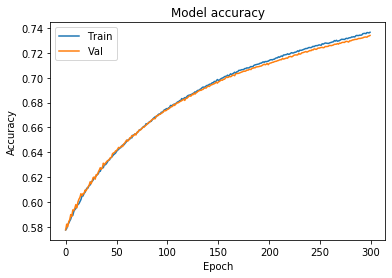

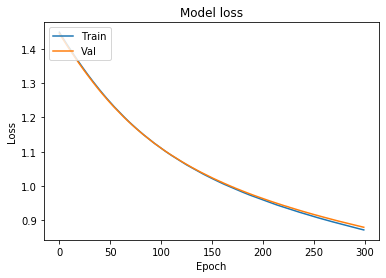

In [161]:
plotModelTrainingValidationLossAccuracy(model9_keras_result_1)

In [165]:
# Evaluate model  on test data

evaluateModel(model9_keras)


# Evaluate on test data
18000/18000 [==============================] - 1s 35us/step
test acc: 0.7262222170829773


In [72]:
#Lets use BatchNormalizaiton, this will help in better training the model and also avoid overfitting ( avoids of vanishing gradient problem too)

## Improving the performance

In [74]:
#Lets add the regularization techniques for better accuracy and avoiding overfitting of model on training dataset

##### Lets Use BatchNormalization 
this will help to reduce vanishing gradient problem and also control the jumping of weight parameters ( this will also make sure training model is not overfit)

In [93]:
#import it first
from keras.layers import BatchNormalization

In [105]:
model_regularized = Sequential()

In [106]:
kernelInitializer='he_uniform'
activation='relu'
learningRate=0.01

In [107]:

model_regularized.add(Dense(units=512,kernel_initializer=kernelInitializer,input_shape=(1024,)))
model_regularized.add(BatchNormalization())
model_regularized.add(Activation(activation))

model_regularized.add(Dense(256, kernel_initializer=kernelInitializer))
model_regularized.add(BatchNormalization())

model_regularized.add(Activation(activation))

model_regularized.add(Dense(10, kernel_initializer=kernelInitializer)) 
model_regularized.add(BatchNormalization())
model_regularized.add(Activation('softmax'))

optimizer = optimizers.adam(learning_rate=learningRate)

model_regularized.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
# now fit the model
model_regularized_result=model_regularized.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=100,batch_size=500,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 9s 217us/step - loss: 0.3762 - accuracy: 0.8819 - val_loss: 0.4158 - val_accuracy: 0.8736
Epoch 2/100
42000/42000 [==============================] - 9s 213us/step - loss: 0.3426 - accuracy: 0.8922 - val_loss: 0.3966 - val_accuracy: 0.8789
Epoch 3/100
42000/42000 [==============================] - 9s 215us/step - loss: 0.3268 - accuracy: 0.8964 - val_loss: 0.4068 - val_accuracy: 0.8787
Epoch 4/100
42000/42000 [==============================] - 9s 223us/step - loss: 0.3206 - accuracy: 0.8974 - val_loss: 0.3694 - val_accuracy: 0.8883
Epoch 5/100
42000/42000 [==============================] - 9s 214us/step - loss: 0.2976 - accuracy: 0.9046 - val_loss: 0.4490 - val_accuracy: 0.8635
Epoch 6/100
42000/42000 [==============================] - 9s 220us/step - loss: 0.2878 - accuracy: 0.9097 - val_loss: 0.3979 - val_accuracy: 0.8807
Epoch 7/100
42000/42000 [==============================]

#### We can see that Training Accuracy is 98% and Validation Accuracy is 94%

##### Now Lets include use dropout regularization too

In [110]:
#import it first
from keras.layers import Dropout

In [111]:
model_regularized_1 = Sequential()

In [112]:
kernelInitializer='he_uniform'
activation='relu'
learningRate=0.01

In [113]:

model_regularized_1.add(Dense(units=512,kernel_initializer=kernelInitializer,input_shape=(1024,)))
model_regularized_1.add(BatchNormalization())
model_regularized_1.add(Activation(activation))
model_regularized_1.add(Dropout(0.2))

model_regularized_1.add(Dense(256, kernel_initializer=kernelInitializer))
model_regularized_1.add(BatchNormalization())
model_regularized_1.add(Activation(activation))
model_regularized_1.add(Dropout(0.2))

model_regularized_1.add(Dense(10, kernel_initializer=kernelInitializer)) 
model_regularized_1.add(Activation('softmax'))

optimizer = optimizers.adam(learning_rate=learningRate)

model_regularized_1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [114]:
# now fit the model
model_regularized_1_result=model_regularized_1.fit(X_train_new, y_train_new,           
          validation_data=(X_val_new,y_val_new),
          epochs=300,batch_size=500,verbose=1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/300
42000/42000 [==============================] - 12s 287us/step - loss: 1.8239 - accuracy: 0.3802 - val_loss: 1.2533 - val_accuracy: 0.6039
Epoch 2/300
42000/42000 [==============================] - 12s 284us/step - loss: 1.0720 - accuracy: 0.6564 - val_loss: 0.8486 - val_accuracy: 0.7360
Epoch 3/300
42000/42000 [==============================] - 12s 291us/step - loss: 0.8876 - accuracy: 0.7208 - val_loss: 0.7462 - val_accuracy: 0.7718
Epoch 4/300
42000/42000 [==============================] - 10s 245us/step - loss: 0.7795 - accuracy: 0.7531 - val_loss: 0.6565 - val_accuracy: 0.7975
Epoch 5/300
42000/42000 [==============================] - 10s 241us/step - loss: 0.7085 - accuracy: 0.7765 - val_loss: 0.5888 - val_accuracy: 0.8208
Epoch 6/300
42000/42000 [==============================] - 10s 233us/step - loss: 0.6762 - accuracy: 0.7854 - val_loss: 0.5602 - val_accuracy: 0.8281
Epoch 7/300
42000/42000 [=========================

Epoch 55/300
42000/42000 [==============================] - 10s 238us/step - loss: 0.2603 - accuracy: 0.9128 - val_loss: 0.2504 - val_accuracy: 0.9330
Epoch 56/300
42000/42000 [==============================] - 10s 240us/step - loss: 0.2734 - accuracy: 0.9078 - val_loss: 0.2549 - val_accuracy: 0.9308
Epoch 57/300
42000/42000 [==============================] - 10s 239us/step - loss: 0.2630 - accuracy: 0.9113 - val_loss: 0.2644 - val_accuracy: 0.9283
Epoch 58/300
42000/42000 [==============================] - 10s 238us/step - loss: 0.2603 - accuracy: 0.9139 - val_loss: 0.2456 - val_accuracy: 0.9344
Epoch 59/300
42000/42000 [==============================] - 10s 246us/step - loss: 0.2582 - accuracy: 0.9143 - val_loss: 0.2488 - val_accuracy: 0.9342
Epoch 60/300
42000/42000 [==============================] - 10s 249us/step - loss: 0.2546 - accuracy: 0.9144 - val_loss: 0.2518 - val_accuracy: 0.9333
Epoch 61/300
42000/42000 [==============================] - 11s 265us/step - loss: 0.2558 - ac

Epoch 163/300
42000/42000 [==============================] - 10s 242us/step - loss: 0.1394 - accuracy: 0.9540 - val_loss: 0.2228 - val_accuracy: 0.9511
Epoch 164/300
42000/42000 [==============================] - 10s 243us/step - loss: 0.1421 - accuracy: 0.9505 - val_loss: 0.2240 - val_accuracy: 0.9499
Epoch 165/300
42000/42000 [==============================] - 10s 244us/step - loss: 0.1485 - accuracy: 0.9498 - val_loss: 0.2326 - val_accuracy: 0.9485
Epoch 166/300
42000/42000 [==============================] - 11s 251us/step - loss: 0.1423 - accuracy: 0.9532 - val_loss: 0.2189 - val_accuracy: 0.9516
Epoch 167/300
42000/42000 [==============================] - 11s 254us/step - loss: 0.1461 - accuracy: 0.9503 - val_loss: 0.2170 - val_accuracy: 0.9536
Epoch 168/300
42000/42000 [==============================] - 10s 244us/step - loss: 0.1455 - accuracy: 0.9509 - val_loss: 0.2181 - val_accuracy: 0.9521
Epoch 169/300
42000/42000 [==============================] - 11s 251us/step - loss: 0.14

Epoch 217/300
42000/42000 [==============================] - 10s 250us/step - loss: 0.1269 - accuracy: 0.9578 - val_loss: 0.2154 - val_accuracy: 0.9557
Epoch 218/300
42000/42000 [==============================] - 10s 246us/step - loss: 0.1172 - accuracy: 0.9607 - val_loss: 0.2228 - val_accuracy: 0.9546
Epoch 219/300
42000/42000 [==============================] - 11s 254us/step - loss: 0.1281 - accuracy: 0.9577 - val_loss: 0.2168 - val_accuracy: 0.9548
Epoch 220/300
42000/42000 [==============================] - 11s 253us/step - loss: 0.1233 - accuracy: 0.9595 - val_loss: 0.2114 - val_accuracy: 0.9573
Epoch 221/300
42000/42000 [==============================] - 10s 249us/step - loss: 0.1189 - accuracy: 0.9601 - val_loss: 0.2136 - val_accuracy: 0.9561
Epoch 222/300
42000/42000 [==============================] - 11s 255us/step - loss: 0.1206 - accuracy: 0.9599 - val_loss: 0.2146 - val_accuracy: 0.9566
Epoch 223/300
42000/42000 [==============================] - 11s 250us/step - loss: 0.12

Epoch 271/300
42000/42000 [==============================] - 11s 265us/step - loss: 0.1091 - accuracy: 0.9634 - val_loss: 0.2159 - val_accuracy: 0.9581
Epoch 272/300
42000/42000 [==============================] - 11s 257us/step - loss: 0.1079 - accuracy: 0.9642 - val_loss: 0.2162 - val_accuracy: 0.9580
Epoch 273/300
42000/42000 [==============================] - 11s 253us/step - loss: 0.1086 - accuracy: 0.9634 - val_loss: 0.2233 - val_accuracy: 0.9556
Epoch 274/300
42000/42000 [==============================] - 10s 249us/step - loss: 0.1067 - accuracy: 0.9634 - val_loss: 0.2185 - val_accuracy: 0.9581
Epoch 275/300
42000/42000 [==============================] - 11s 255us/step - loss: 0.1113 - accuracy: 0.9634 - val_loss: 0.2197 - val_accuracy: 0.9577
Epoch 276/300
42000/42000 [==============================] - 11s 254us/step - loss: 0.1098 - accuracy: 0.9631 - val_loss: 0.2212 - val_accuracy: 0.9564
Epoch 277/300
42000/42000 [==============================] - 10s 250us/step - loss: 0.11

#### We can see that Training Accuracy is 96% and Validation Accuracy is 95%

## Lets apply these models on Test Data 

In [115]:
# Evaluate model  model2_keras

evaluateModel(model2_keras)


# Evaluate on test data
18000/18000 [==============================] - 1s 63us/step
test acc: 0.8190555572509766


#### Test Accuracy of 81% using model model2_keras

In [116]:
# Evaluate model  model9_keras

evaluateModel(model9_keras)


# Evaluate on test data
18000/18000 [==============================] - 1s 44us/step
test acc: 0.5775555372238159


#### Test Accuracy of 57% using model model9_keras

In [117]:
# Evaluate model  model_regularized ( Batch normalization)

evaluateModel(model_regularized)


# Evaluate on test data
18000/18000 [==============================] - 1s 58us/step
test acc: 0.8358333110809326


#### Test Accuracy of 83% using model model_regularized

In [118]:
# Evaluate model  model_regularized ( Batch normalization+ Dropout)

evaluateModel(model_regularized_1)


# Evaluate on test data
18000/18000 [==============================] - 1s 56us/step
test acc: 0.8716111183166504


### Test Accuracy of 87% using model model_regularized_1

### So the best model is model_regularized_1 

In [121]:
#Predict the output

y_pred=model_regularized_1.predict(X_test_new)

In [144]:
#Lets get the max probality of the output
y_pred_new = np.argmax(y_pred,axis=1)

In [155]:
# Lets print the metric and report

print('Accuracy score %s'%(metrics.accuracy_score(y_test,y_pred_new)))
print('Confustion Matrix \n \n%s'%(confusion_matrix(y_test,y_pred_new)))
print('classification Report \n \n%s'%(classification_report(y_test,y_pred_new)))

Accuracy score 0.8716111111111111
Confustion Matrix 
 
[[1631   27   13   19   16    8   21   14   21   44]
 [  20 1630   17   34   39   16   17   31   13   11]
 [   7   31 1595   41   20   12    6   37   22   32]
 [  11   24   26 1470   11   76   19   24   35   23]
 [  14   52   16   27 1619   12   20   12   15   25]
 [  10   12    8   89    8 1511   56    5   41   28]
 [  36   17   16   24   29   61 1560   12   66   11]
 [  10   66   43   23   14   14    7 1607    8   16]
 [  21   30   20   46   14   35   61    9 1525   51]
 [  42   28   23   47   18   36   10   16   43 1541]]
classification Report 
 
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1814
           1       0.85      0.89      0.87      1828
           2       0.90      0.88      0.89      1803
           3       0.81      0.86      0.83      1719
           4       0.91      0.89      0.90      1812
           5       0.85      0.85      0.85      1768
          

- from the classification report we can see that final model as performed good in predicting correct class as correct and incorrect class as incorrect with percentage of 87
- from precision we can see that it has performed good in predicting numbers 0,2,4,7 as correct values with more than 90% accuracy

## So the best model that returing highest accuracy is 87% ( model with regularization techniqes)

# Summary
- Load , understand and process the DataSet
> - Dataset was available in .h5 file format and we had to use the h5py library to load the file
> - On extracting the data from file we found out that the data was divided into 3 sets , Trainset, ValSet and TestSet (with its corresponding X and Y feature)
> - We also noticed that each feature dataset was 3-D data ex : X_train was having shape (42000, 32, 32) and target dataset of 1-D :ex y_train (42000,)
> - As part of Data Preprocessing we first converted all the list of dataset to numpyArray
> - Since we had 3-D data we rehsaped them to 2d like #Reshaping the data ( n * 32 * 32) to (n * 1024) as all model accept 2-D data
> - target variables y_* holds the classification value like values ranging from 0 to 9, we had to convert them to binary values, we used keras to_categorical to convert the same  ex : y_train (42000,) to (42000,10)
> - When then noramlized the data using StandardScalar to make sure all the dataset is in same scale

- K-Nearest Neighbor(KNN) classifier Apporach

> - With KNN aproach we noticed that validatoin accuracy was not that great, we got around 57% ( executed on google colab, it took close to 14 hours)

- Deep Learning Technique ( Neural Network Classifier)
> - We used Keras to build the network, started by importing all the required libraries
> - Since our target variable was multiclass classification we used softmax activation on output layer
> - We first built multiple network using training set and validated it on validation set, however execution on Testset is done at the end
> - We build multiple Netowrks ( used 10 Epochs and batch_size 50)
    - Basic Neural Network -1 , With this Training Accuracy is 91% and Validation Accuracy is 88% 
        - Hidden node -1
        - Activation funtion - Relu
        - kernelinitializer - uniform
        - Optimizer - Adam
    - Neural Network -2 , With this Training Accuracy is 91% and Validation Accuracy is 89%
        - Hidden node -2
        - Activation funtion - Relu
        - kernelinitializer - uniform
        - Optimizer - Adam , with learning rate 0.001
    - Neural Network -3 , With this Training Accuracy is 10% and Validation Accuracy is 10%
        - Hidden node -2
        - Activation funtion - Relu
        - kernelinitializer - uniform
        - Optimizer - Adam ,with learning rate 0.01
    - Neural Network -4 , With this Training Accuracy is 89% and Validation Accuracy is 87%
        - Hidden node -2
        - Activation funtion - Relu
        - kernelinitializer - uniform
        - Optimizer - SGD with learning rate 0.01
    - Neural Network -5 , With this Training Accuracy is 63% and Validation Accuracy is 63%
        - Hidden node -2
        - Activation funtion - Relu
        - kernelinitializer - uniform
        - Optimizer - SGD with learning rate 0.001
    - Neural Network -6 , With this Training Accuracy is 90% and Validation Accuracy is 89%
        - Hidden node -2
        - Activation funtion - glorot_uniform ( Xavier)
        - kernelinitializer - uniform
        - Optimizer - SGD with learning rate 0.01
    - Neural Network -7 , With this Training Accuracy is 87% and Validation Accuracy is 75%
        - Hidden node -2
        - Activation funtion - glorot_uniform ( Xavier)
        - kernelinitializer - uniform
        - Optimizer - SGD with learning rate 0.001
    - Neural Network -8 , With this Training Accuracy is 91% and Validation Accuracy is 90%
        - Hidden node -2
        - Activation funtion - relu
        - kernelinitializer - he_uniform
        - Optimizer - SGD with learning rate 0.01
    - Neural Network -9 , With this Training Accuracy is 55% and Validation Accuracy is 57%
        - Hidden node -2
        - Activation funtion - sigmoid
        - kernelinitializer - he_uniform
        - Optimizer - Adam with learning rate 0.01
> - We noticed that  Neural Network -2 with Neural Network -9 were best among the onces we build with Train/Val accuracy close to 90%

- Improving the performance
> - we then used GridSearchCV to find the optimal values for batch_size and epochs for better accuracy, as per it we found best values as ----> {'batch_size': 500, 'epochs': 300}
> - We use the models Neural Network -2 with Neural Network -9 and improve them to get better accuracy
> - Stochastic gradient, cross-entropy
> - We used regularization techniques to improve out training model ( so that model is not overfit) and performs better on validation/test model
> - Then we applyed batch normalizatoin on each of the identified Neural network , this will help to reduce vanishing gradient problem and also control the jumping of weight parameters ( this will also make sure training model is not overfit), with this we got Training Accuracy as 98% and Validation Accuracy as 94%
> - Then used the dropout to see if this improves the accuracy.
> - After all this we got a accuracy of 96% on training and 95% validation dataset

- Applying model on Test DataSet to find how it behaves :)
> - On applying the good models on test data set we found out below results
> - Test Accuracy of 81% using model model2_keras
> - Test Accuracy of 57% using model model9_keras
> - Test Accuracy of 83% using model model_regularized
> - Test Accuracy of 87% using model model_regularized_1
> - So the best model that giving accuracy of 87% is model_regularized_1 where we have adam optimizer, BatchNormalization and dropbout

- Final Statement
> - On going through different models we noticed that the Neural network does better job in predicting the results whihc gave us 87% accuracy on test dataset where as KNN gave us around 50% accuracy

- NOTE: KNN model executed from google colab and screenshots are attached